In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

#1.Loaded data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Keep the Id before dropping it
test_id = test_df['Id']

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [2]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
print(train_df.isnull().sum().sort_values(ascending=False))
print(test_df.isnull().sum().sort_values(ascending=False))

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64
PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
MasVnrType        894
                 ... 
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
SaleCondition       0
Length: 80, dtype: int64


In [7]:
#seperating the Target from train_df
y = train_df['SalePrice']
X = train_df.drop(['SalePrice', 'Id'], axis=1)

In [8]:
#Dropping Id from test feature, since its not a feature
test_df = test_df.drop(['Id'], axis=1)

In [9]:
# For numeric columns:
numeric_cols = X.select_dtypes(include=['int64','float64']).columns
for col in numeric_cols:
    median = X[col].median()
    X[col] = X[col].fillna(median)
    test_df[col] = test_df[col].fillna(median)

In [10]:
# For categorical columns
cat_cols = X.select_dtypes(include=['object']).columns
for col in cat_cols:
    X[col] = X[col].fillna('None')
    test_df[col] = test_df[col].fillna('None')

In [11]:
#One Hot encoding for categorical features
X = pd.get_dummies(X, drop_first=True)
test_df = pd.get_dummies(test_df, drop_first=True)

In [40]:
# Align the train and test feature sets (so they have same columns)
X, test_df = X.align(test_df, join='left', axis=1, fill_value=0)

In [12]:
#Log transform for skewed numeric feature
from scipy.stats import skew

# Need to recalc numeric columns after dummy & align
numeric_feats = X.select_dtypes(include=['int64','float64']).columns

skewed = X[numeric_feats].apply(lambda col: skew(col.dropna()))
skewed_cols = skewed[skewed > 0.75].index

for col in skewed_cols:
    X[col] = np.log1p(X[col])
    test_df[col] = np.log1p(test_df[col])

#also to y
y_log = np.log1p(y)

In [28]:
#Split for Validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y_log, test_size=0.2, random_state=42)

In [30]:
#Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [32]:
#Validation
y_pred_valid_log = model.predict(X_valid)
rmse_log = root_mean_squared_error(y_valid, y_pred_valid_log)
print('Validation RMSE:', rmse_log)

Validation RMSE: 0.1458851435009071


In [52]:
# feature importance
importances = model.feature_importances_
feat_imp = pd.Series(importances, index=X_train.columns)
feat_imp_sorted = feat_imp.sort_values(ascending=False)

print("Top 20 features by importance:")
print(feat_imp_sorted.head(20))

Top 20 features by importance:
OverallQual          0.547562
GrLivArea            0.114076
TotalBsmtSF          0.044074
GarageCars           0.041918
GarageArea           0.023627
BsmtFinSF1           0.021799
1stFlrSF             0.019733
CentralAir_Y         0.017026
LotArea              0.015446
YearBuilt            0.014702
OverallCond          0.010056
YearRemodAdd         0.009031
2ndFlrSF             0.007322
OpenPorchSF          0.006972
BsmtUnfSF            0.006324
LotFrontage          0.006068
GarageType_Detchd    0.004779
GarageYrBlt          0.004169
WoodDeckSF           0.003863
Fireplaces           0.003756
dtype: float64


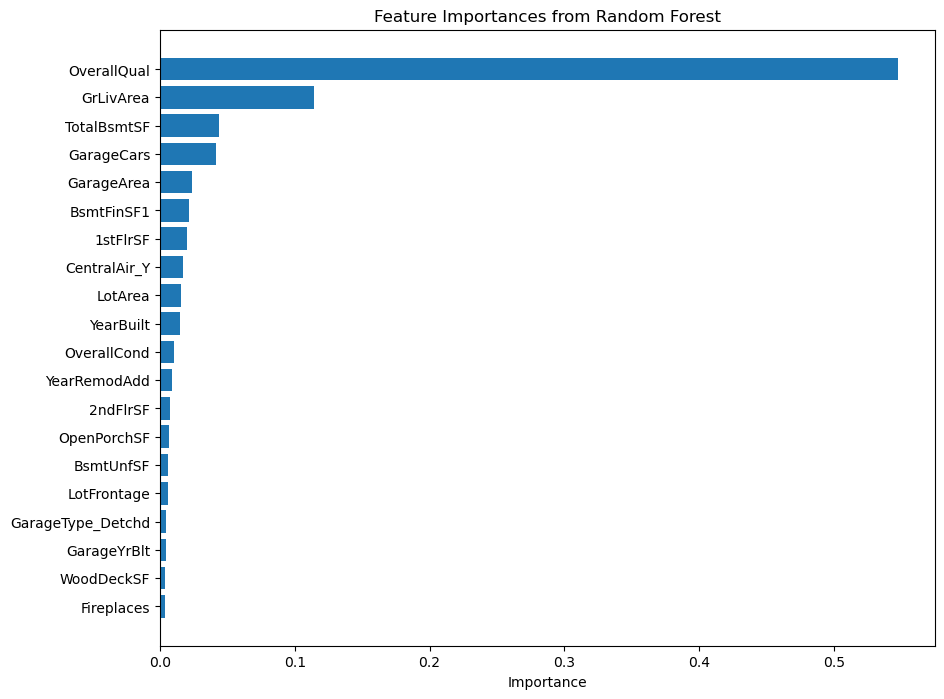

In [58]:
plt.figure(figsize=(10,8))
plt.barh(feat_imp_sorted.head(20).index[::-1], feat_imp_sorted.head(20)[::-1])
plt.xlabel("Importance")
plt.title("Feature Importances from Random Forest")
plt.show()

In [34]:
# Convert back to original scale to see RMSE in original price units
y_valid_orig = np.expm1(y_valid)
y_pred_valid_orig = np.expm1(y_pred_valid_log)
rmse_orig = np.sqrt(((y_valid_orig - y_pred_valid_orig) ** 2).mean())
print("Validation RMSE on original SalePrice:", rmse_orig)

Validation RMSE on original SalePrice: 29063.030559757677


In [42]:
#prediction on test
test_pred_log = model.predict(test_df)
test_pred_orig = np.expm1(test_pred_log)

In [50]:
#Submission
submission = pd.DataFrame({'Id': test_id, 'SalePrice': test_pred_orig})
submission.to_csv('House_Price_Prediction.csv', index=False, float_format='%.2f')